### HW0003： MNIST and LeNet 

◎ 基本題

1. 下載以下四個檔案 [1]：<br>
train-images-idx3-ubyte.gz: training set images (9912422 bytes)<br>
train-labels-idx1-ubyte.gz: training set labels (28881 bytes)<br>
t10k-images-idx3-ubyte.gz: test set images (1648877 bytes)<br>
t10k-labels-idx1-ubyte.gz: test set labels (4542 bytes) <br>
將其用解壓縮軟體解壓縮之後得到四個檔案

2. 輸出 train-images.idx3-ubyte 檔案中的第一個圖，大小為 28x28。<br>
格式以下面 4x4 矩陣為例：<br>

00 11 22 33<br>
44 55 66 77<br>
88 99 AA BB<br>
CC DD EE FF<br>

3.  輸出 train-images.idx3-ubyte 檔案中前十個圖的平均圖，採無條件捨去，大小為 28x28。

4. 輸出 train-labels.idx1-ubyte 檔案中前十個 labels 的平均，精確度取至小數點以下兩位，採無條件捨去。

5. 輸出 train-images.idx3-ubyte 檔案中的第一個圖，大小為 32x32。原圖置中，多出來的地方補0。


◎ 進階題
6. 做基本題2時，將圖檔存成BMP格式 [2]。

In [57]:
### mAiLab_0003：MNIST and LeNet 

import numpy as np
import requests
import os
#from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm as tqdm
import gzip

In [58]:
# Return target file size in byte (int)
def check_size(url):
    r = requests.get(url, stream=True)
    return int(r.headers['Content-Length'])

# Define helper function for download (int)
def download_file(url, filename, bar=True):
    """
    Helper method handling downloading large files 
    from `url` to `filename`. Returns a pointer to `filename`.
    """
    try:
        chunkSize = 1024
        r = requests.get(url, stream=True)
        with open(filename, 'wb') as f:
            if bar:
                pbar = tqdm(unit="B", total=check_size(url))
            for chunk in r.iter_content(chunk_size=chunkSize): 
                if chunk: # filter out keep-alive new chunks
                    if bar: 
                        pbar.update(len(chunk))
                    f.write(chunk)
        return
    except Exception as e:
        print(e)
        return

In [56]:
#HW0003-1: 下載以下四個檔案, 將其用解壓縮軟體解壓縮之後得到四個檔案

filename_list = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
                't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']
#Download
for filename in filename_list:
    download_file('http://yann.lecun.com/exdb/mnist/' + filename, filename)

print(os.listdir())

100%|██████████| 4542/4542 [00:00<00:00, 2732041.99B/s]

['train-images-idx3-ubyte.gz', '__notebook_source__.ipynb', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz', '.ipynb_checkpoints', 'train-labels-idx1-ubyte.gz']


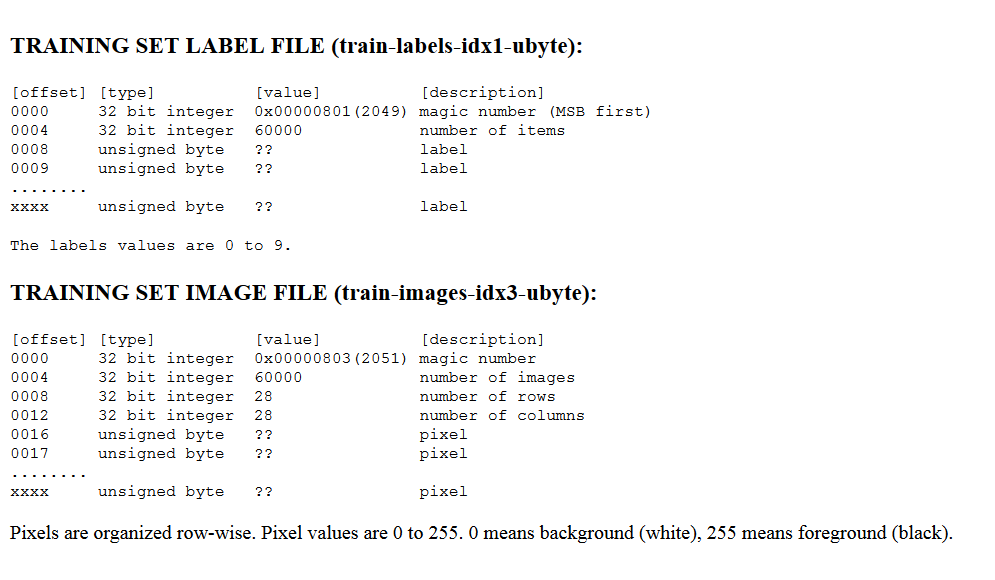

In [131]:
#Load image and label from xxx.gz
def read_mnist(images, labels):
    with gzip.open(labels, 'rb') as labelsFile:
        #the lable byte begin form the 0008 byte, so we set the offset to 8 for ignoring 0~7
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images,'rb') as imagesFile:
        data_size = len(labels)
        # Load flat 28x28 px images
        # the lable byte begin form the 0016 byte, so we set the offset to 8 for ignoring 0~15
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16).reshape(data_size, 28, 28)
        
    return features, labels

#print out image by a 28*28 matrix
def print_image(file):
    for i in file:
        for j in i:
            # {:02X} output the pixel numbers by two digits hexadecimal
            # example: 255 -> FF ; 14 -> 1E
            print("{:02X}".format(j), end=' ') 
        print()
    print()


#HW0003-2:  輸出 train-images.idx3-ubyte 檔案中的第一個圖，大小為 28x28
image, label = read_mnist(images=filename_list[0], labels=filename_list[1])
print('first label:{}'.format(label[0]))
print('first image:')
print_image(image[0])

first label:5
first image:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 
00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 
00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 
00 00 00 00 00 00 00 12 DB FD FD FD FD FD C6 B6 F7 F1 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 50 9C 6B FD FD CD 0B 00 2B 9A 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 0E 01 9A FD 5A 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 8B FD

In [183]:
#HW0003-3:  輸出 train-images.idx3-ubyte 檔案中前十個圖的平均圖，採無條件捨去，大小為 28x28。
image_avg = np.zeros((28,28))
for i in range(10):
    image_avg += image[i]

image_avg = (image_avg/10).astype('uint8')

print('average of first 10 images:')
print_image(image_avg)

average of first 10 images:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 0E 19 15 08 0F 19 0F 05 00 00 12 13 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 07 1C 2B 4D 3B 41 4A 5C 4D 42 45 35 1C 00 00 00 00 
00 00 00 00 06 08 00 00 03 07 17 26 3B 6D 88 6A 64 6D 78 6B 6B 59 31 0F 00 00 00 00 
00 00 00 00 0C 10 00 04 17 2B 32 37 5D A2 AC 8A 7B 73 65 79 80 5F 20 00 00 00 00 00 
00 00 00 00 16 10 00 01 15 25 41 65 95 B7 A1 6D 5E 78 6E 7F 7D 50 0A 00 00 00 00 00 
00 00 00 00 16 10 00 00 08 1A 31 68 95 A6 68 26 38 56 66 84 77 36 00 00 00 00 00 00 
00 00 00 04 18 10 00 00 00 21 4A 5B 7D 78 3D 3B 39 44 62 74 6D 35 05 00 00 00 00 00 
00 00 00 0C 19 10 00 00 11 2C 3F 46 4

In [184]:
#HW0003-4:  輸出 train-labels.idx1-ubyte 檔案中前十個 labels 的平均，精確度取至小數點以下兩位，採無條件捨去。
label_avg = label[0:10].mean()
print("{:.2f}".format(label_avg))

3.00


In [186]:
#HW0003-5:  輸出 train-images.idx3-ubyte 檔案中的第一個圖，大小為 32x32。原圖置中，多出來的地方補0。
#           (zero padding)

#def zero_padding(img):
#    pass

padded_image = np.pad(image[0], [2, 2], mode='edge')
print("Padded image")
print_image(padded_image)


Padded image
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 00 00 
00 00 00 00 00 00

In [187]:
#HW0003-6:  將第一張圖檔存成BMP格式
import scipy.misc
scipy.misc.imsave('first_training_image.bmp', image[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
